# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Indest Data

In [7]:
df = pd.read_csv('Churn_Modelling.csv')
df1=df.copy()
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df1.shape

(10000, 14)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df1.duplicated().sum()

0

In [12]:
df1.apply(lambda x: x.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df1.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
df.isna().sum().any()

False

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [18]:
df1 = df1.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [20]:
df1.shape

(10000, 11)

### Categorical Features

In [21]:
df1.select_dtypes('object')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [27]:
df1.groupby('Geography')['Exited'].mean().iplot(kind='barh', subplots =True);

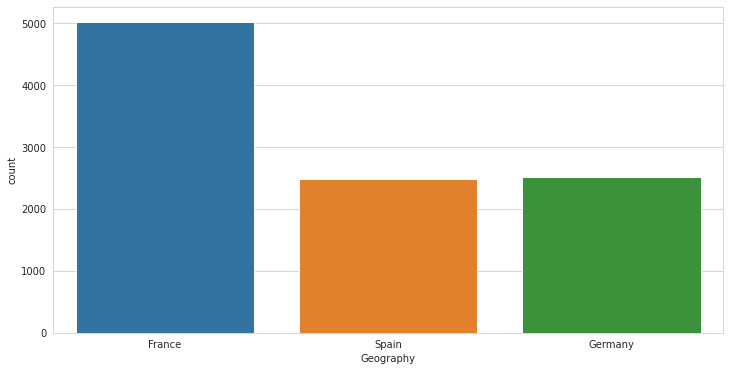

In [29]:
sns.countplot(df1["Geography"])

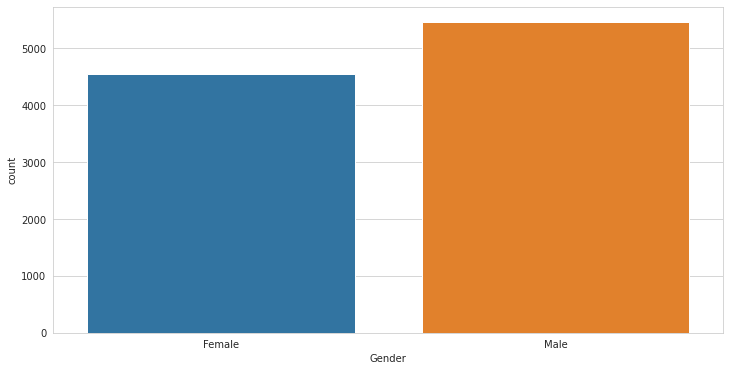

In [30]:
sns.countplot(df1["Gender"])

### Numerical Features

In [31]:
numerical = df1.drop(['Exited'], axis= 1).select_dtypes('number').columns

In [32]:
numerical

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

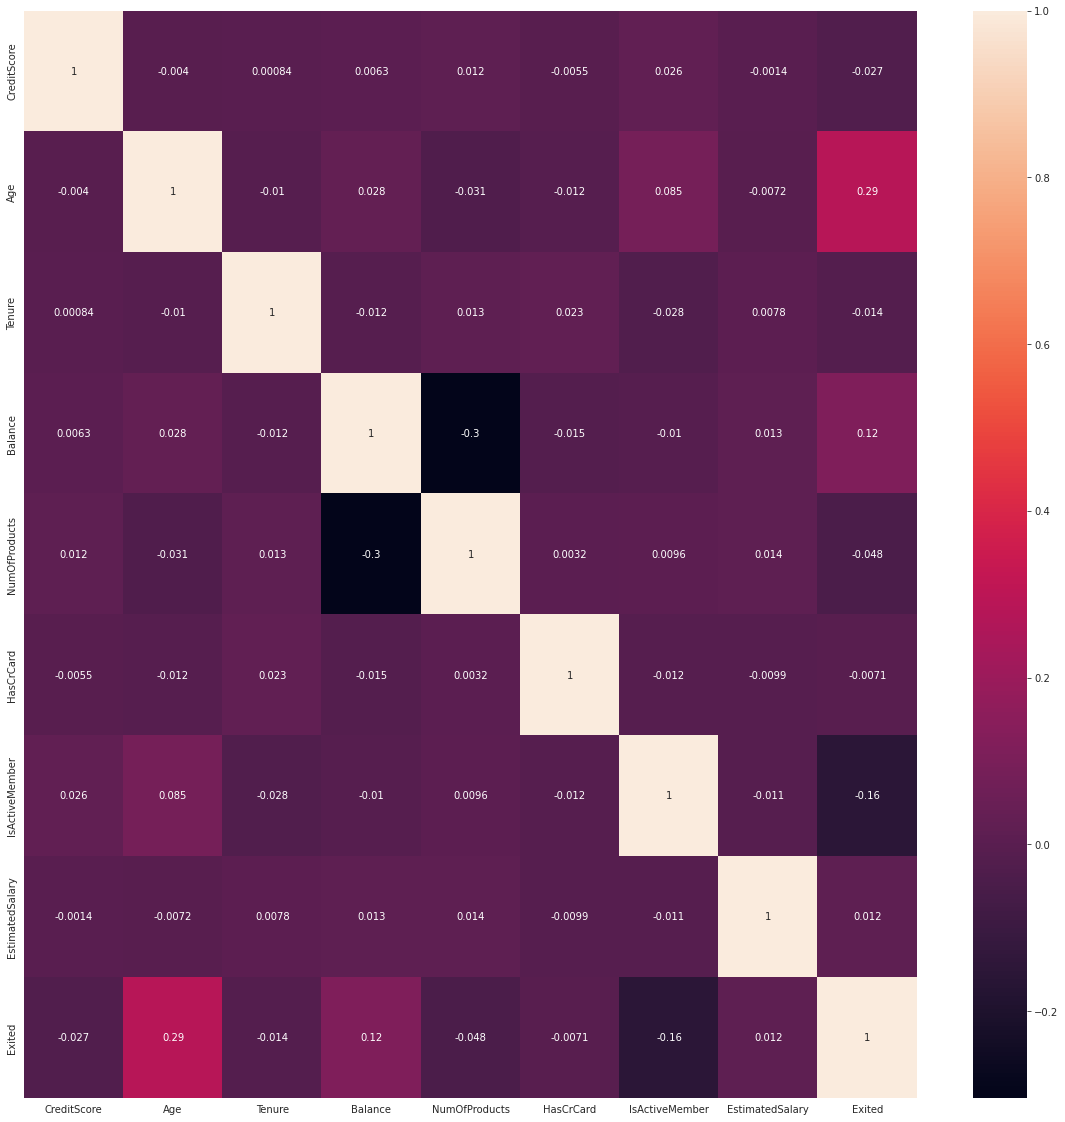

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True);

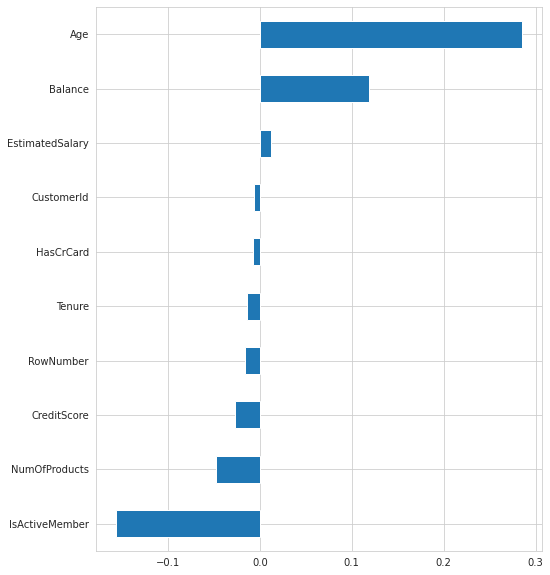

In [35]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

### Target Variable

In [37]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

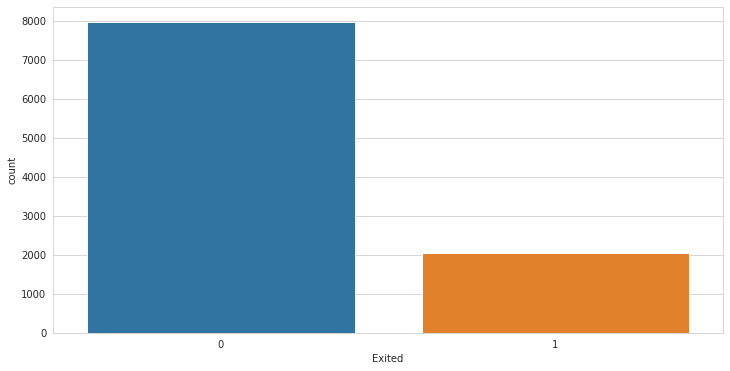

In [39]:
sns.countplot(df1["Exited"]);

In [42]:
df1 = pd.get_dummies(df1, drop_first = True)

In [43]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


## Preprocessing of Data
- Train | Test Split, Scalling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df1.drop('Exited', axis=1)
y = df1['Exited'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Modelling & Model Performance

### Import related libraries

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [47]:
X_train.shape

(9000, 11)

In [48]:
X_test.shape

(1000, 11)

### Creating Model

### without class_weigth

In [50]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 2s 2ms/step - loss: 0.4945 - accuracy: 0.7957 - val_loss: 0.4513 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.8001 - val_loss: 0.4209 - val_accuracy: 0.8256
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8140 - val_loss: 0.4052 - val_accuracy: 0.8289
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8178 - val_loss: 0.3968 - val_accuracy: 0.8389
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8212 - val_loss: 0.3851 - val_accuracy: 0.8489
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8227 - val_loss: 0.3777 - val_accuracy: 0.8522
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8253 - val_loss: 0.3661 - val_accuracy:

#### Evaluate

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494,0.796,0.451,0.799
1,0.456,0.800,0.421,0.826
2,0.438,0.814,0.405,0.829
3,0.429,0.818,0.397,0.839
4,0.423,0.821,0.385,0.849


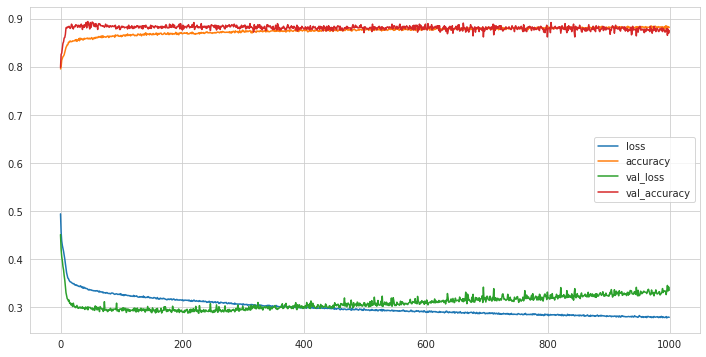

In [53]:
loss_df.plot();

In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[745  51]
 [107  97]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.48      0.55       204

    accuracy                           0.84      1000
   macro avg       0.76      0.71      0.73      1000
weighted avg       0.83      0.84      0.83      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [56]:
from sklearn.utils import class_weight

In [57]:
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [58]:
class_weight

array([0.62787777, 2.45499182])

In [68]:
class_weights = {0:0.62787777, 1:2.45499182}

In [66]:
model_weight = Sequential()

model_weight.add(Dense(30, activation = "relu"))
model_weight.add(Dense(15, activation = "relu"))
model_weight.add(Dense(1, activation = "sigmoid"))

model_weight.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
model_weight.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6623 - accuracy: 0.6146 - val_loss: 0.6530 - val_accuracy: 0.6333
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6263 - accuracy: 0.6427 - val_loss: 0.5961 - val_accuracy: 0.6933
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5973 - accuracy: 0.6722 - val_loss: 0.5428 - val_accuracy: 0.7389
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5712 - accuracy: 0.7030 - val_loss: 0.4897 - val_accuracy: 0.7833
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7217 - val_loss: 0.5067 - val_accuracy: 0.7722
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7332 - val_loss: 0.4628 - val_accuracy: 0.8022
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.7444 - val_loss: 0.4479 - val_accuracy:

#### Evaluate

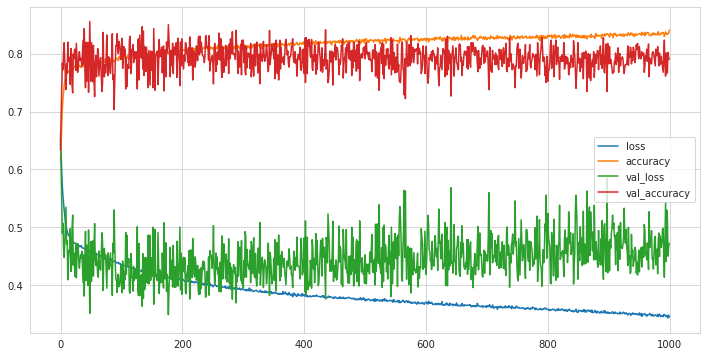

In [72]:
loss_df = pd.DataFrame(model_weight.history.history)
loss_df.plot()

In [73]:
y_pred = (model_weight.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[611 185]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.43      0.68      0.52       204

    accuracy                           0.75      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.81      0.75      0.77      1000



In [76]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.8001 - val_loss: 0.4022 - val_accuracy: 0.8344
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8225 - val_loss: 0.3646 - val_accuracy: 0.8467
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8377 - val_loss: 0.3374 - val_accuracy: 0.8644
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8478 - val_loss: 0.3352 - val_accuracy: 0.8600
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8491 - val_loss: 0.3127 - val_accuracy: 0.8800
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8527 - val_loss: 0.3095 - val_accuracy: 0.8778
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8526 - val_loss: 0.3039 - val_accuracy:

## Evaluate

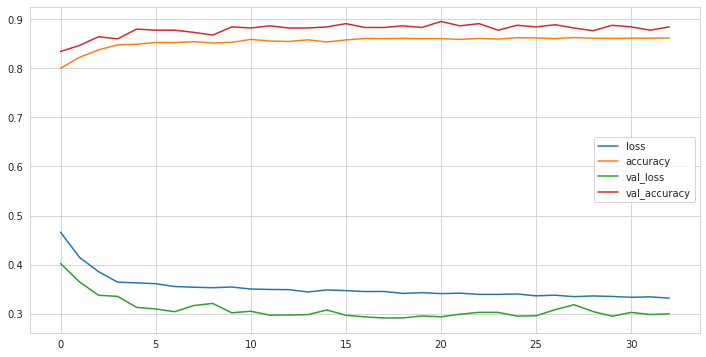

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [74]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [81]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

## Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_exited", 'wb'))

In [ ]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

### Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_churn = load_model('model_churn.h5')
scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [ ]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

In [ ]:
single_patient = scaler_exited.transform(single_patient)
single_patient

In [ ]:
(model_churn.predict(single_patient) > 0.5).astype("int32")